# Titanic: Machine Learning from Disaster

**Para ver o artigo relacionado a este *notebook*, [CLIQUE AQUI](http://sigmoidal.ai/data-science-titanic-python-1/)

---

O desafio do Titanic é uma das competições mais famosas, e é promovida pelo site [kaggle.com](http://kaggle.com). Tamanha popularidade desta competição fez com que ela fosse considerada como sendo um ***Hello, World!*** para o universo fantástico do Data Science (Ciência de Dados).

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o *navio mais moderno do mundo* para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, **seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.**

![Data Science, Python e Titanic](img/titanic.jpeg)

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros. 

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

Com os dados **reais** disponibilizados, agora você pode fazer uma análise exploratória, testar suas hipóteses e até mesmo construir um modelo preditivo (que tal descobrir quais seriam suas chances de sobrevivência na 1ª Classe se você tivesse viajado com sua esposa e filho?!)

> **Resumidamente, o objetivo deste desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.** 

## Sobre este notebook

Este notebook é parte de uma série de artigos do meu blog, [sigmoidal.ai](http://sigmoidal.ai):

* [PARTE I](http://sigmoidal.ai/data-science-titanic-python-1/)
* [PARTE II](http://sigmoidal.ai/data-science-titanic-python-2/)

A ideia é introduzir o assunto de **DATA SCIENCE** para iniciantes na área, por isso tentei não me aprofundar em nenhum conceito ou análise, de maneira que seja possível reproduzir (e entender) todos passos usados.


## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação

## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo

Espera-se que você consiga fazer uma **análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de **construir um modelo que dê a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como *input*.


### Métrica de Desempenho

O *score* é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a **acurácia** do modelo.


## 2. Obtenção dos Dados

[Os dados disponibilizados pelo Kaggle](https://www.kaggle.com/c/titanic/data) foram divididos em dois grupos:

* Dataset de treino (```train.csv```)
    * Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não. 
    * Composto por diversas *features* como gênero do passageiro e classe do embarque.
* Dataset de Teste (```test.csv```)
    * Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
    
Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (```gender_submission```).

Para conseguir baixar os arquivos, é precisar criar um login no Kaggle antes. Para facilitar, os arquivos estão junto com este notebook (pasta ```./data/...```

In [1]:
# listar os arquivos no diretório
!tree

.
├── Titanic-Copy1.ipynb
├── Titanic.ipynb
├── data
│   ├── gender_submission.csv
│   ├── test.csv
│   └── train.csv
├── img
│   ├── kaggle_lr.png
│   ├── kaggle_tree.png
│   └── titanic.jpeg
├── submission.csv
├── submission_lr.csv
└── submission_tree.csv

2 directories, 11 files


In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

**Q1.** Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [4]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável ```Survived``` é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [5]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

In [6]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


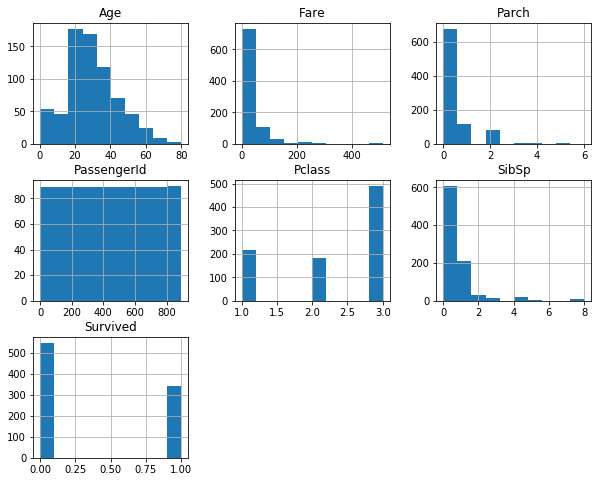

In [8]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [9]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


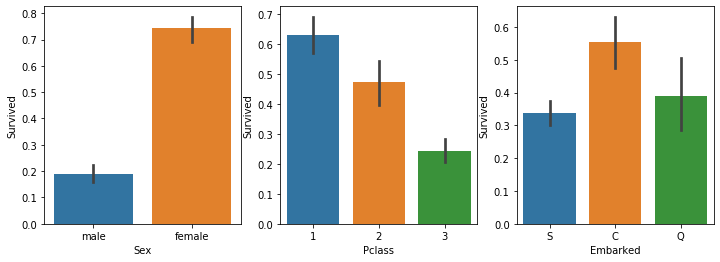

In [10]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

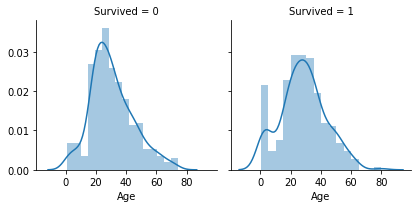

In [11]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

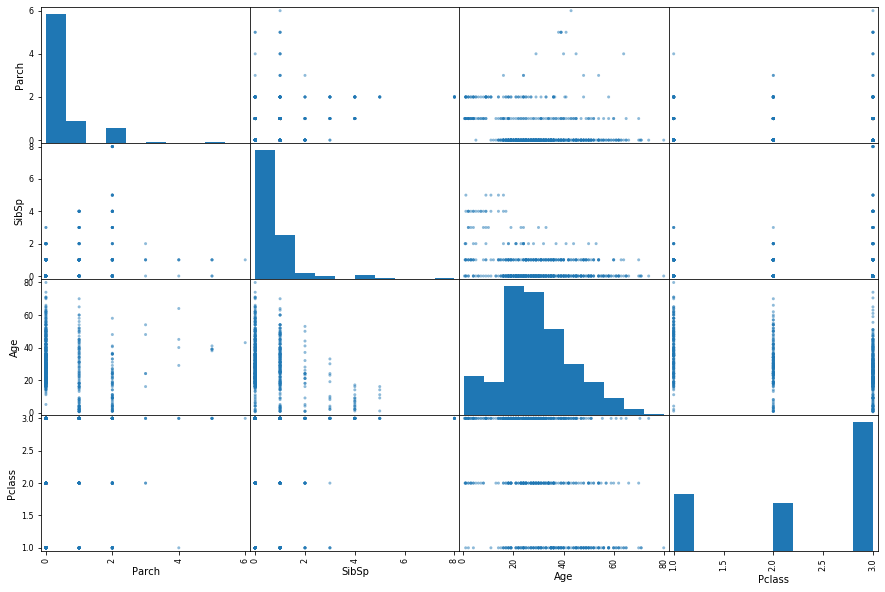

In [12]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

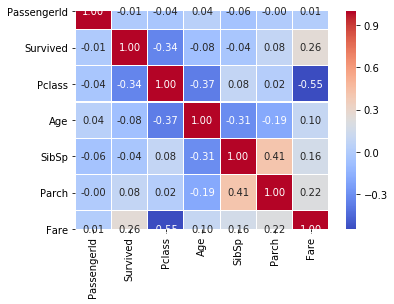

In [13]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

Pouca gente sabe que o método ```df.describe()``` pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento ```include=['O']```. 

**ATENÇÃO, é a letra 'O', e não o número 0!**

In [14]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lefebre, Miss. Jeannie",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Olhando esses dados a gente observa que:
* Os valores para ```Name``` são únicos, um para cada pessoa;
* Não há *missing values* para ```Name``` e ```Sex```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

## 4 Preparação dos Dados

Até o presente momento, tudo o que fizemos foi importar os dados para estruturas *DataFrame*, formular hipóteses, iniciar uma análise exploratória dos dados e visualizar graficos e correlações entre aquelas variáveis que julgamos pertinente.

Um projeto de data science não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.

Quando a gente pega o *notebook* de alguém, fica sempre a impressão que está bem estruturado e que foi "direto ao ponto*. No entanto, antes de trazer uma versão bonitinha, eu vou e volto ao começo inúmeras vezes!

Lembre-se disso: uma versão final é uma versão que foi reescrita várias vezes. Vá e volte ao começo sempre que precisar para adicionar informações novas que fizeram sentido :)

### Juntando os *datasets* de treino e teste

Uma dica para quando você vai preparar os dados para um modelo de *Machine Learning* é juntar os *datasets* de treino e teste em um único, e separar novamente no final.

Muitas vezes a gente vai fazer um *feature engineering*, criar variáveis *dummy* ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

Por isso, é muito mais fácil fazer todas as etapas para um único *DataFrame* e dividir novamente entre treino e teste.

In [15]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


### Selecionar as *features*

Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais *features* serão usadas para o modelo de *Machine Learning*.

No nosso caso, vamos desconsiderar as variáveis ```['PassengerId', 'Name', 'Ticket', 'Cabin']```, pois **aparentemente** não parecem relevantes.

In [16]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ```['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']```.

### Valores faltante

Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando a gente encontra *missing values*:
* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
* Excluir a linha inteira.

Cada caso é um caso e novamente você, cientista de dados, é quem vai tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

In [17]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [18]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### Preparar as variáveis pro modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de ```Sex```para ```{'male': 0, 'female': 1}```. Já em relação à variável ```Embarked```, apliquei o conceito de variáveis dummies.

As variáveis dummies (*dummy variables*) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o *DataFrame* após todos esses tratamentos:

In [19]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperando os datasets de treino e teste

Aqui a gente acabou de preparar o *dataset* para o modelo e vou dividir ```df_merged``` em ```train``` e ```test```, exatamente como era no começo.

Agora você consegue entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [20]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## 5 Construção do Modelo e Avaliação

Eu vivo falando no meu [Instagram](http://instagram.com/carlos_melo.py) que a etapa mais demorada de qualquer projeto de *Data Science* é a Análise Exploratória de Dados e a preparação/tratamento deles.

Todo cuidado que tivemos serviu para entender o problema, testar hipóteses e descartar dados desnecessários/redundantes.

Com poucas linhas de código a gente consegue criar e otimizar modelos de *Machine Learning* básicos. Aqui, vamos construir dois:

* Modelo de Regressão Logística
* Modelo de Árvore de Decisão

In [21]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


Com praticamente duas linhas, construímos um modelo de Regressão Logística com acurácia de 80% em cima do conjunto de dados de treino.

Esse resultado está excelente para um primeiro modelo. Vou aproveitar e fazer a previsão sobre o *dataset* de teste para submetermos ao [Kaggle](http://www.kaggle.com) e comparar o desempenho.

In [23]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

Como você vê na figura abaixo, nosso modelo conseguiu atingir um *score* de 75%. 

<img src="img/kaggle_lr.png" width="80%">

Não é incomum termos desempenho inferior quando submetemos as previsões, pois nosso modelo foi treinado 100% em cima do conjunto de treino: isso significa que ele tem um *fit* bem melhor ao *dataset train*.

Vamos ver como se sai um modelo baseado em Árvores de Decisão, seguindo os mesmo passos.

In [24]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


Um pequeno ganho na acurácia, chegando agora a quase 83%. Novamente vou gerar um arquivo e submeter o resultado ao [Kaggle](http://www.kaggle.com).

In [25]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

Como você vê na figura abaixo, nosso modelo conseguiu atingir um *score* de 75%. 

<img src="img/kaggle_tree.png" width="80%">

Seguindo a previsão, melhoramos a nossa performance em cima do conjunto de testes também, obtendo um *score* de 78%.

### Eu sobreviveria ao Titanic?

Por fim, já que nosso modelo está pronto, vamos ver se eu e minha esposa sobreviveríamos ao naufrágio do Titanic.

Vou considerar que viajaríamos na 2ª Classe, eu com 35 anos e ela com 30, levando nosso bebê Theo, tendo pago o preço médio do Ticket e embarcados no porto de Southampton (Reino Unido).

In [26]:
# declarar os valores das variáveis para mim e minha esposa
carlos_melo = np.array([2, 0, 35, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
fernanda = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Carlos Melo:\t{}".format(tree_model.predict(carlos_melo)[0]))
print("Fernanda:\t{}".format(tree_model.predict(fernanda)[0]))

Carlos Melo:	0
Fernanda:	1


Infelizmente, de acordo com meu próprio modelo, eu não teria sobrevivido ao desastre do Titanic. Já minha esposa foi classificada como sobrevivente. Parece que a realidade retratada no filme de James Cameron traz algumas verdades.

Espero que tenha aproveitado este artigo e consiga replicar no seu computador.

Com a sua evolução natural, você consegue cada vez mais trabalhar dados e parâmetros, além de aplicar conceitos como *feature engineering*, para obter resultados cada vez melhores.

Fato é, o desafio do Titanic é a melhor escolha para quem está começando no Data Science, e já abre sua mente para outros tipos de problemas :)